A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import models
import numpy as np
import matplotlib.pyplot as plt




In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

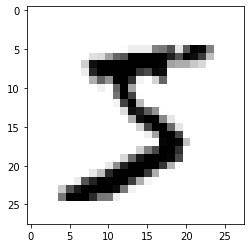

In [25]:
plt.imshow(train_images[0], cmap= 'binary')

In [19]:
model = keras.Sequential()
model.add(layers.Conv2D(filters= 8, kernel_size= (3,3), input_shape= (28, 28)))
model.add(layers.MaxPooling2D(pool_size= (2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32))
model.add(layers.Dense(10 , activation= 'softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3276 - accuracy: 0.9035
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1735 - accuracy: 0.9478
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1457 - accuracy: 0.9560
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1325 - accuracy: 0.9590
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1249 - accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1195 - accuracy: 0.9636
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1153 - accuracy: 0.9646
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1108 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1082 - accuracy: 0.9658
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [22]:
# Segundo Modelo 

In [23]:
model2 = keras.Sequential()
model2.add(layers.Conv2D(filters= 8, kernel_size= (3,3), input_shape= (28, 28)))
model2.add(layers.MaxPooling2D(pool_size= (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10 , activation= 'softmax'))

In [28]:
model2.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= 'accuracy')

In [29]:
model2.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3531 - accuracy: 0.8959
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1793 - accuracy: 0.9454
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1457 - accuracy: 0.9562
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1299 - accuracy: 0.9598
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1211 - accuracy: 0.9621
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1148 - accuracy: 0.9645
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1114 - accuracy: 0.9650
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1083 - accuracy: 0.9654
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1075 - accuracy: 0.9655
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [31]:
predictions1 = model.predict(test_images)

In [34]:
predictions1[0]

array([6.5885409e-08, 1.7103028e-08, 2.4169356e-06, 1.5496495e-05,
       1.3093764e-10, 3.8133948e-08, 4.9692298e-13, 9.9998093e-01,
       2.1019275e-08, 1.0223687e-06], dtype=float32)

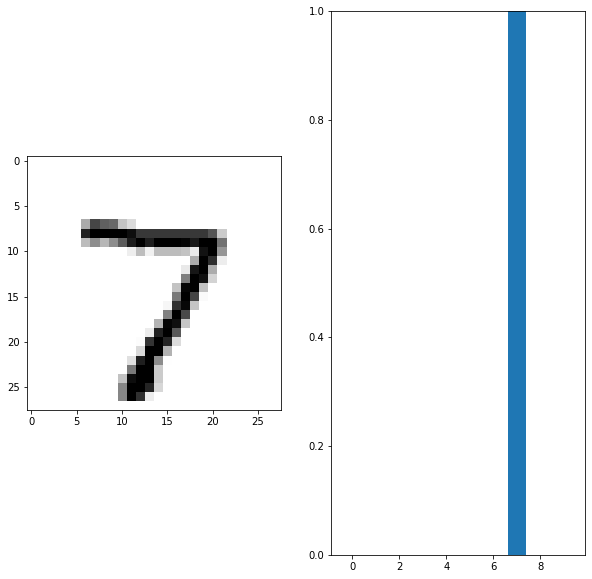

In [44]:
plt.figure(figsize= (10,10))
plt.subplot(1,2,1)
plt.bar(range(10),predictions1[0])

plt.subplot(1,2,2)
plt.imshow(test_images[0], cmap= 'binary')

plt.ylim([0,1])
plt.grid(False)